<a href="https://colab.research.google.com/github/souradipta93/Deep-Learning-AI/blob/main/Credit_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#numpy - numerical python
import pandas as pd
#pandas- stands for panel data
import matplotlib.pyplot as plt
#matlab plot library

In [ ]:
#read the data file from excel
dataset= pd.read_excel("Data_JPM.xlsx")
#check if the data properly loaded using head function
dataset.head()

,Customer ID,Date of Default,Amount Default,Cumulative Payment till date,Gender,State,Bank,Default,Purchase Channel,Age,Insurance,Loan,Savings,FD,DMAT,Fraud,Card Type,City
0,546301568,2019-08-24 00:00:00,582993,420324.0,1,0,ICICI,1,3,59.0,1,663918,216348,0,1,N,0,Delhi
1,18658241,2020-12-04 00:00:00,760344,708671.0,1,0,SBI,1,1,59.0,1,107236,439609,1,0,N,0,Kolkata
2,545307255,2018-10-30 00:00:00,433971,835055.0,0,2,SBI,0,1,35.0,0,745659,415287,1,0,N,1,Delhi
3,685777392,2019-04-14 00:00:00,945476,759583.0,0,1,SBI,1,2,38.0,0,24216,284974,0,0,N,0,Mumbai
4,838154128,2020-11-30 00:00:00,874825,71394.0,1,2,SBI,1,3,50.0,0,794057,18748,1,1,N,1,Mumbai


In [ ]:
X= dataset.iloc[:,[2,3,4,5,6,8,9,10,11,12,13,14,16,17]].values
X

array([[582993, 420324.0, 1, ..., 1, 0, 'Delhi'],
       [760344, 708671.0, 1, ..., 0, 0, 'Kolkata'],
       [433971, 835055.0, 0, ..., 0, 1, 'Delhi'],
       ...,
       [634376, 723328.0, 0, ..., 1, 1, 'Mumbai'],
       [160692, 844678.0, 0, ..., 0, 1, 'Mumbai'],
       [654997, 726110.0, 0, ..., 0, 1, 'Kolkata']], dtype=object)

Y variable is "**Default**" and X variables are Amount Default,	Cumulative Payment till date,	Gender,	State,	Bank, Purchase Channel,	Age,Insurance, Loan, Savings,	FD,	DMAT,	Card Type,	City. 

We have dropped Customer ID,	Date of Default because they are not significant and "**Default**" cause it is Y variable. Also we are not taking "Fraud" because all the values are "N".




In [ ]:
y= dataset.iloc[:,7].values
y

array([1, 1, 0, ..., 0, 1, 0])

Y is our dependent variable.
The iloc function allows us to locate the row and columns from where we want to pick-up the data in this case:signifies picking up all the rows. This data is in the form of panel data which will not allow further mathematics to happen, So we need to convert it into numerical python array.

We have selected the column 7, "Default" as the y variable for all the rows
':' indicates that we have selected all the rows

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,13] = labelencoder.fit_transform(X[:,13])
X

array([[582993, 420324.0, 1, ..., 1, 0, 1],
       [760344, 708671.0, 1, ..., 0, 0, 2],
       [433971, 835055.0, 0, ..., 0, 1, 1],
       ...,
       [634376, 723328.0, 0, ..., 1, 1, 3],
       [160692, 844678.0, 0, ..., 0, 1, 3],
       [654997, 726110.0, 0, ..., 0, 1, 2]], dtype=object)

**Encoding** of categorical variables.
Categorical variables are State,	Bank, Purchase Channel,City.

We will be using **LabelEncoder** and **OneHotEncoder** which is in sklearn. For this we need to import the relevant files.

Label Encoding: We have done for "Bank" and "City".

In [ ]:
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer(transformers=[("one", OneHotEncoder(), [3,4,5,13])], remainder = "passthrough")
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 0, 1, 0],
       [1.0, 0.0, 0.0, ..., 1, 0, 0],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 1, 1],
       [0.0, 0.0, 1.0, ..., 0, 0, 1],
       [0.0, 0.0, 1.0, ..., 0, 0, 1]], dtype=object)

One hot encoding is required to make sense of State, Bank, Purchase Channel and City encoding For this we'll use new function called "Column Transformer" Syntax: ColumnTransformer(name, object, column number)

In [ ]:
X = pd.DataFrame(X, columns = ["St1","St2", "St3","Ba1","Ba2","Ba3","Ch1","Ch2","Ch3","City1","City2","City3","City4", "Amount", "Payment", "Gender","Age","Insurance", "Loan", "Savings","FD","DMAT","CardType"])
X

,St1,St2,St3,Ba1,Ba2,Ba3,Ch1,Ch2,Ch3,City1,City2,City3,City4,Amount,Payment,Gender,Age,Insurance,Loan,Savings,FD,DMAT,CardType
0,1,0,0,0,1,0,0,0,1,0,1,0,0,582993,420324,1,59,1,663918,216348,0,1,0
1,1,0,0,0,0,1,1,0,0,0,0,1,0,760344,708671,1,59,1,107236,439609,1,0,0
2,0,0,1,0,0,1,1,0,0,0,1,0,0,433971,835055,0,35,0,745659,415287,1,0,1
3,0,1,0,0,0,1,0,1,0,0,0,0,1,945476,759583,0,38,0,24216,284974,0,0,0
4,0,0,1,0,0,1,0,0,1,0,0,0,1,874825,71394,1,50,0,794057,18748,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,0,0,1,0,0,1,0,0,70821,114691,0,30,0,973742,573346,1,1,0
9996,1,0,0,0,0,1,1,0,0,0,0,1,0,554232,81514,0,31,0,491200,150875,1,1,1
9997,0,1,0,0,0,1,0,0,1,0,0,0,1,634376,723328,0,36,1,102200,773862,0,1,1
9998,0,0,1,0,0,1,1,0,0,0,0,0,1,160692,844678,0,49,0,225028,629408,0,0,1


Convert the data into Data frame. 
**State** is converted to "St1", "St2", "St3".
**Bank** is converted to "Ba1", "Ba2", "Ba3".
**Purchace channels** to Ch1	Ch2	Ch3.
**City** to City1	City2	City3	City4.

In [ ]:
X= X.drop("St1", axis=1)
X= X.drop("Ba1", axis=1)
X= X.drop("Ch1", axis=1)
X= X.drop("City1", axis=1)
X

,St2,St3,Ba2,Ba3,Ch2,Ch3,City2,City3,City4,Amount,Payment,Gender,Age,Insurance,Loan,Savings,FD,DMAT,CardType
0,0,0,1,0,0,1,1,0,0,582993,420324,1,59,1,663918,216348,0,1,0
1,0,0,0,1,0,0,0,1,0,760344,708671,1,59,1,107236,439609,1,0,0
2,0,1,0,1,0,0,1,0,0,433971,835055,0,35,0,745659,415287,1,0,1
3,1,0,0,1,1,0,0,0,1,945476,759583,0,38,0,24216,284974,0,0,0
4,0,1,0,1,0,1,0,0,1,874825,71394,1,50,0,794057,18748,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,1,0,1,0,0,70821,114691,0,30,0,973742,573346,1,1,0
9996,0,0,0,1,0,0,0,1,0,554232,81514,0,31,0,491200,150875,1,1,1
9997,1,0,0,1,0,1,0,0,1,634376,723328,0,36,1,102200,773862,0,1,1
9998,0,1,0,1,0,0,0,0,1,160692,844678,0,49,0,225028,629408,0,0,1


From dataframe drop variable Dummy Variable.
Axis =1  indicates where should python look for Dummy variable. Here '1' represents X-axis and '0' means Y-axis

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=56)

Splitting the dataset into the training and test set.
The train_test_split library is located in **sklearn.model_selection**

In [ ]:
#Feature Scaling 
# TO standardize the data get the Standard Scalar function from "sklearn.preprocessing". 
from sklearn.preprocessing import StandardScaler
# Pass on functionality to a new variable called "sc".
sc = StandardScaler()
#Standardize the data
#fit_transform is being done on the X_train data
#Model is learning the mean and variance from the train data AKA fit 
#After learning it is implementing it AKA transform 

X_train = sc.fit_transform(X_train)

#Model is using the fit and variance of train data and applying it on test data
# So no need to fit but only transform
X_test = sc.transform(X_test)

**MODEL**: There are 19 inputs and 1 output nodes. We are planning to use 2 hidden layers in the middle. The **activation function** is '**Relu**' and for output we have '**sigmoid**' **activation function**. The **optimizer** is '**Adam**' and **loss function** is '**binary cross entropy**'. The metrics we are interested in is **Accuracy**. **Epoch are 100 and batch size is 10**.

In [ ]:
# Importing the Keras libraries and packages
import keras
# Sequential because the model has all layers in a sequence.
from keras.models import Sequential
#Dense implies hidden layers which we cannot access from outside
# These are built in Keras functions
from keras.layers import Dense

#Initialising the Deep Learning Model
classifier = Sequential()
#Adding the input layer
#Input_dimensions=19
#The first hidden layer has 10 units, weights are taken randomly from an uniform distribution and activation is Relu
classifier.add(Dense(units=10, kernel_initializer='uniform', activation = 'relu', input_dim=19))
# Adding the second hidden layer
classifier.add(Dense(units=10, kernel_initializer='uniform', activation = 'relu'))
# Adding the output layer
# Here the activation function is Sigmoid as it is a binary classification problem
classifier.add(Dense(units=1, kernel_initializer='uniform', activation = 'sigmoid'))


#Compiling the DNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fitting the DNN to the training set
classifier.fit(X_train,y_train, batch_size = 10, epochs = 100)

Epoch 1/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5092
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4880
Epoch 5/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4899
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4884
Epoch 7/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4962
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5033
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.6932 - accura

In [ ]:
print(mean)
print(var)

0.48514285683631897
0.011904379678814555


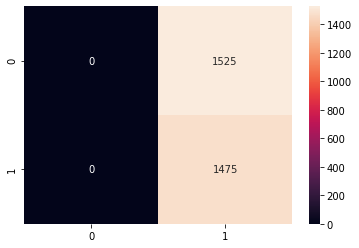

In [ ]:
import seaborn as sns
#Predicting the test set results 
# Send the test data through the trained model
# Get the probability of prediction
# Determine if the value is less than or more than the cut-off value
y_pred = classifier.predict(X_test)
# Here I have chosen 0.5 as the cut-off value 
# If it is more than 0.5 then I have assigned it 1 otherwise 0
# y_test has the actual class information which we will compare the predicted class information
y_pred = (y_pred> 0.5)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import ReLU

# # make an user defined empty funtion
#def build_classifier():
   #classifier = Sequential()
   #classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))
   #classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
   #classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
   #classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])
   #return classifier

#classifier = KerasClassifier(build_fn= build_classifier, batch_size = 10, epochs = 100)
#computation of accuracy scores
#accuracie = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
#mean = accuracie.mean()
#var = accuracie.std()


In [ ]:
#print (mean)
#print (var)